In [2]:
import pandas as pd
import json
from pandas import json_normalize
import mysql.connector 
import matplotlib.pyplot as plt
import seaborn as sns
with open("/Users/saranya/Documents/odis.json",'r') as f1:
        data=json.load(f1)
      
    

In [ ]:
#ODI match
import pandas as pd

deliveries = []

for inning in data['innings']:
    team = inning['team']
    for over in inning['overs']:
        for delivery in over['deliveries']:
            delivery['team'] = team
            deliveries.append(delivery)

odi_df = pd.json_normalize(deliveries)
odi_df.head(500)

,batter,bowler,non_striker,team,runs.batter,runs.extras,runs.total,extras.wides,wickets,extras.noballs,extras.legbyes,extras.byes
0,CT Dhururu,O Prendergast,K Ndlovu,Zimbabwe,0,0,0,NaN,NaN,NaN,NaN,NaN
1,CT Dhururu,O Prendergast,K Ndlovu,Zimbabwe,0,1,1,1.0,NaN,NaN,NaN,NaN
2,CT Dhururu,O Prendergast,K Ndlovu,Zimbabwe,0,0,0,NaN,NaN,NaN,NaN,NaN
3,CT Dhururu,O Prendergast,K Ndlovu,Zimbabwe,0,0,0,NaN,NaN,NaN,NaN,NaN
4,CT Dhururu,O Prendergast,K Ndlovu,Zimbabwe,0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
495,L Delany,L Tshuma,O Prendergast,Ireland,0,0,0,NaN,"[{'player_out': 'L Delany', 'kind': 'bowled'}]",NaN,NaN,NaN
496,L Paul,L Tshuma,O Prendergast,Ireland,0,0,0,NaN,NaN,NaN,NaN,NaN
497,L Paul,L Tshuma,O Prendergast,Ireland,0,0,0,NaN,NaN,NaN,NaN,NaN
498,L Paul,L Tshuma,O Prendergast,Ireland,1,0,1,NaN,NaN,NaN,NaN,NaN


In [4]:
print("total Deliveries:" ,len(odi_df) )
print("Total Runs:",odi_df['runs.total'].sum())
print("Total wickets:",odi_df['wickets'].notnull().sum())

total Deliveries: 561
Total Runs: 360
Total wickets: 16


In [5]:
odi_df.groupby("batter")["runs.batter"].sum().sort_values(ascending=False)


batter
O Prendergast         67
CS Mugeri-Tiripano    56
M Mupachikwa          45
GH Lewis              44
L Delany              18
A Canning             14
A Hunter              14
N Gwanzura            14
CT Dhururu            12
R Pasipanodya         11
L Paul                 7
B Biza                 4
L Tshuma               4
S Forbes               2
M Mavunga              1
L Little               1
K Ndlovu               0
F Chipare              0
Name: runs.batter, dtype: int64

In [6]:
print("Top bowlers")
wickets=odi_df[odi_df["wickets"].notnull()]
top_bowlers=wickets.groupby("bowler").size().sort_values(ascending=False).head(10)
print(top_bowlers)


Top bowlers
bowler
A Dalzell     4
L Tshuma      4
LA McBride    3
A Canning     1
C Murray      1
F Chipare     1
K Chigora     1
L Little      1
dtype: int64


In [7]:
odi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   batter          561 non-null    object 
 1   bowler          561 non-null    object 
 2   non_striker     561 non-null    object 
 3   team            561 non-null    object 
 4   runs.batter     561 non-null    int64  
 5   runs.extras     561 non-null    int64  
 6   runs.total      561 non-null    int64  
 7   extras.wides    32 non-null     float64
 8   wickets         16 non-null     object 
 9   extras.noballs  1 non-null      float64
 10  extras.legbyes  6 non-null      float64
 11  extras.byes     3 non-null      float64
dtypes: float64(4), int64(3), object(5)
memory usage: 52.7+ KB


In [8]:
odi_df[["extras.wides", "extras.noballs", "extras.legbyes"]].sum()

extras.wides      35.0
extras.noballs     1.0
extras.legbyes     6.0
dtype: float64

In [10]:
#DATA TRANSFORMATION USING PANDAS
# Fill NaNs in extras columns with 0
odi_df["extras.wides"]=odi_df["extras.wides"].fillna(0)
odi_df["extras.legbyes"] = odi_df["extras.legbyes"].fillna(0)
odi_df["extras.noballs"] = odi_df["extras.noballs"].fillna(0)


# Create a single "extras" column as sum of extras
odi_df["extras"] = (
    odi_df["extras.wides"] +
    odi_df["extras.legbyes"] +
    odi_df["extras.noballs"] 
)

# Drop unnecessary or sparse columns
odi_df.drop(columns=[
    "extras.wides", "extras.legbyes", "extras.noballs", 
    "runs.non_boundary", "review.by", "review.umpire", "review.batter",
    "review.decision", "replacements.role", "extras.penalty",
    "review.umpires_call", "replacements.match", "review.type"
], inplace=True, errors='ignore')  # Use errors='ignore' in case some don't exist

# Keep only relevant columns
cols = ['match_id', 'team', 'batter', 'bowler', 'non_striker',
        'runs.batter', 'runs.extras', 'extras', 'runs.total', 'wickets']

odi_df = odi_df[[col for col in cols if col in odi_df.columns]]

print("Cleaned ODI DataFrame shape:", odi_df.shape)
display(odi_df.head())

Cleaned ODI DataFrame shape: (561, 9)


,team,batter,bowler,non_striker,runs.batter,runs.extras,extras,runs.total,wickets
0,Zimbabwe,CT Dhururu,O Prendergast,K Ndlovu,0,0,0.0,0,NaN
1,Zimbabwe,CT Dhururu,O Prendergast,K Ndlovu,0,1,1.0,1,NaN
2,Zimbabwe,CT Dhururu,O Prendergast,K Ndlovu,0,0,0.0,0,NaN
3,Zimbabwe,CT Dhururu,O Prendergast,K Ndlovu,0,0,0.0,0,NaN
4,Zimbabwe,CT Dhururu,O Prendergast,K Ndlovu,0,0,0.0,0,NaN


In [20]:
odi_df.head(500)

,team,batter,bowler,non_striker,runs.batter,runs.extras,extras,runs.total,wickets
0,Zimbabwe,CT Dhururu,O Prendergast,K Ndlovu,0,0,0.0,0,NaN
1,Zimbabwe,CT Dhururu,O Prendergast,K Ndlovu,0,1,1.0,1,NaN
2,Zimbabwe,CT Dhururu,O Prendergast,K Ndlovu,0,0,0.0,0,NaN
3,Zimbabwe,CT Dhururu,O Prendergast,K Ndlovu,0,0,0.0,0,NaN
4,Zimbabwe,CT Dhururu,O Prendergast,K Ndlovu,0,0,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...
495,Ireland,L Delany,L Tshuma,O Prendergast,0,0,0.0,0,"[{'player_out': 'L Delany', 'kind': 'bowled'}]"
496,Ireland,L Paul,L Tshuma,O Prendergast,0,0,0.0,0,NaN
497,Ireland,L Paul,L Tshuma,O Prendergast,0,0,0.0,0,NaN
498,Ireland,L Paul,L Tshuma,O Prendergast,1,0,0.0,1,NaN


In [21]:
odi_df["wickets"]=odi_df["wickets"].fillna(0)
odi_df

/var/folders/x2/7jtpy5cd0998xxzh4prs67x80000gn/T/ipykernel_1304/887901219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odi_df["wickets"]=odi_df["wickets"].fillna(0)


,team,batter,bowler,non_striker,runs.batter,runs.extras,extras,runs.total,wickets
0,Zimbabwe,CT Dhururu,O Prendergast,K Ndlovu,0,0,0.0,0,0
1,Zimbabwe,CT Dhururu,O Prendergast,K Ndlovu,0,1,1.0,1,0
2,Zimbabwe,CT Dhururu,O Prendergast,K Ndlovu,0,0,0.0,0,0
3,Zimbabwe,CT Dhururu,O Prendergast,K Ndlovu,0,0,0.0,0,0
4,Zimbabwe,CT Dhururu,O Prendergast,K Ndlovu,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
556,Ireland,O Prendergast,K Ndlovu,A Canning,1,0,0.0,1,0
557,Ireland,A Canning,K Ndlovu,O Prendergast,0,0,0.0,0,0
558,Ireland,A Canning,K Ndlovu,O Prendergast,1,0,0.0,1,0
559,Ireland,O Prendergast,K Ndlovu,A Canning,4,0,0.0,4,0


In [11]:
# Test Match
with open("/Users/saranya/Documents/tests.json",'r') as f3:
        data3=json.load(f3)
        deliveries = []

for inning in data3['innings']:
    team = inning['team']
    for over in inning['overs']:
        for delivery in over['deliveries']:
            delivery['team'] = team
            deliveries.append(delivery)

test_df = pd.json_normalize(deliveries)
test_df.head(500)

,batter,bowler,non_striker,team,runs.batter,runs.extras,runs.total,wickets,extras.wides,extras.legbyes,extras.byes
0,BJ Bennett,MJ Henry,BJ Curran,Zimbabwe,1,0,1,NaN,NaN,NaN,NaN
1,BJ Curran,MJ Henry,BJ Bennett,Zimbabwe,0,0,0,NaN,NaN,NaN,NaN
2,BJ Curran,MJ Henry,BJ Bennett,Zimbabwe,2,0,2,NaN,NaN,NaN,NaN
3,BJ Curran,MJ Henry,BJ Bennett,Zimbabwe,0,0,0,NaN,NaN,NaN,NaN
4,BJ Curran,MJ Henry,BJ Bennett,Zimbabwe,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
495,WA Young,SC Williams,DP Conway,New Zealand,1,0,1,NaN,NaN,NaN,NaN
496,DP Conway,SC Williams,WA Young,New Zealand,3,0,3,NaN,NaN,NaN,NaN
497,DP Conway,Sikandar Raza,WA Young,New Zealand,0,0,0,NaN,NaN,NaN,NaN
498,DP Conway,Sikandar Raza,WA Young,New Zealand,0,0,0,NaN,NaN,NaN,NaN


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   batter          1360 non-null   object 
 1   bowler          1360 non-null   object 
 2   non_striker     1360 non-null   object 
 3   team            1360 non-null   object 
 4   runs.batter     1360 non-null   int64  
 5   runs.extras     1360 non-null   int64  
 6   runs.total      1360 non-null   int64  
 7   wickets         31 non-null     object 
 8   extras.wides    3 non-null      float64
 9   extras.legbyes  7 non-null      float64
 10  extras.byes     3 non-null      float64
dtypes: float64(3), int64(3), object(5)
memory usage: 117.0+ KB


In [13]:
print("total Deliveries:" ,len(test_df) )
print("Total Runs:",test_df['runs.total'].sum())
print("Total wickets:",test_df['wickets'].notnull().sum())

total Deliveries: 1360
Total Runs: 629
Total wickets: 31


In [14]:
test_df[["extras.wides", "extras.byes", "extras.legbyes"]].sum()

extras.wides       8.0
extras.byes       10.0
extras.legbyes     7.0
dtype: float64

In [15]:
test_df.isnull().sum()

batter               0
bowler               0
non_striker          0
team                 0
runs.batter          0
runs.extras          0
runs.total           0
wickets           1329
extras.wides      1357
extras.legbyes    1353
extras.byes       1357
dtype: int64

In [16]:
#print("Test matches:", test_df['match_id'].nunique())
print("Total deliveries:", len(test_df))

Total deliveries: 1360


In [17]:
test_df.groupby("batter")["runs.batter"].sum().sort_values(ascending=False).head(10)

batter
DP Conway      92
DJ Mitchell    80
CR Ervine      61
TE Tsiga       57
SC Williams    51
WA Young       41
HM Nicholls    38
NR Welch       31
BJ Bennett     24
BJ Curran      24
Name: runs.batter, dtype: int64

In [18]:
wickets = test_df[test_df["wickets"].notnull()]
wickets.groupby("bowler").size().sort_values(ascending=False).head(10)

bowler
MJ Henry         9
MJ Santner       5
B Muzarabani     4
NG Smith         3
W O'Rourke       3
NT Nyamhuri      2
TL Chivanga      2
SC Williams      1
Sikandar Raza    1
V Masekesa       1
dtype: int64

In [19]:
#TEST MATCHES DATA TRANSFORMATION USNG PANDAS

test_df["extras.wides"] = test_df["extras.wides"].fillna(0)
test_df["extras.legbyes"] = test_df["extras.legbyes"].fillna(0)
test_df["extras.byes"] = test_df["extras.byes"].fillna(0)

test_df["extras"] = (
    test_df["extras.wides"] +
    test_df["extras.byes"] +
    test_df["extras.legbyes"] 
   
)
test_df.drop(columns=[
    "extras.wides", "extras.legbyes",  "extras.byes",
    "runs.non_boundary", "review.by", "review.umpire", "review.batter",
    "review.decision", "replacements.role", "extras.penalty",
    "review.umpires_call", "replacements.match", "review.type"
], inplace=True, errors='ignore')  # Use errors='ignore' in case some don't exist



cols = [
    'team', 'batter', 'bowler', 'non_striker',
    'runs.batter', 'runs.extras', 'extras', 'runs.total', 'wickets'
]
test_df = test_df[[col for col in cols if col in test_df.columns]]


print("Cleaned Test DataFrame shape:", test_df.shape)
display(test_df.head())

Cleaned Test DataFrame shape: (1360, 9)


,team,batter,bowler,non_striker,runs.batter,runs.extras,extras,runs.total,wickets
0,Zimbabwe,BJ Bennett,MJ Henry,BJ Curran,1,0,0.0,1,NaN
1,Zimbabwe,BJ Curran,MJ Henry,BJ Bennett,0,0,0.0,0,NaN
2,Zimbabwe,BJ Curran,MJ Henry,BJ Bennett,2,0,0.0,2,NaN
3,Zimbabwe,BJ Curran,MJ Henry,BJ Bennett,0,0,0.0,0,NaN
4,Zimbabwe,BJ Curran,MJ Henry,BJ Bennett,0,0,0.0,0,NaN


In [23]:
test_df["wickets"]=test_df["wickets"].fillna(0)
test_df

,team,batter,bowler,non_striker,runs.batter,runs.extras,extras,runs.total,wickets
0,Zimbabwe,BJ Bennett,MJ Henry,BJ Curran,1,0,0.0,1,0
1,Zimbabwe,BJ Curran,MJ Henry,BJ Bennett,0,0,0.0,0,0
2,Zimbabwe,BJ Curran,MJ Henry,BJ Bennett,2,0,0.0,2,0
3,Zimbabwe,BJ Curran,MJ Henry,BJ Bennett,0,0,0.0,0,0
4,Zimbabwe,BJ Curran,MJ Henry,BJ Bennett,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
1355,New Zealand,WA Young,SC Williams,HM Nicholls,0,0,0.0,0,0
1356,New Zealand,WA Young,SC Williams,HM Nicholls,0,0,0.0,0,0
1357,New Zealand,WA Young,SC Williams,HM Nicholls,0,0,0.0,0,0
1358,New Zealand,HM Nicholls,NT Nyamhuri,WA Young,0,0,0.0,0,0


In [25]:
#T20 MAtch
with open("/Users/saranya/Documents/t20.json",'r') as f4:
        data4=json.load(f4)
        deliveries = []

for inning in data4['innings']:
    team = inning['team']
    for over in inning['overs']:
        for delivery in over['deliveries']:
            delivery['team'] = team
            deliveries.append(delivery)

t20_df = pd.json_normalize(deliveries)
t20_df.head(500)

,batter,bowler,non_striker,team,runs.batter,runs.extras,runs.total,wickets,extras.noballs,extras.wides,extras.byes,extras.legbyes
0,S Houghton,Lovedeep Singh,OSB Tilley,Croatia,0,0,0,NaN,NaN,NaN,NaN,NaN
1,S Houghton,Lovedeep Singh,OSB Tilley,Croatia,4,0,4,NaN,NaN,NaN,NaN,NaN
2,S Houghton,Lovedeep Singh,OSB Tilley,Croatia,0,0,0,"[{'player_out': 'S Houghton', 'fielders': [{'n...",NaN,NaN,NaN,NaN
3,ZXM Vukusic,Lovedeep Singh,OSB Tilley,Croatia,1,0,1,NaN,NaN,NaN,NaN,NaN
4,OSB Tilley,Lovedeep Singh,ZXM Vukusic,Croatia,0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
230,R Mazumder,OSB Tilley,Adam Senn,Cyprus,1,0,1,NaN,NaN,NaN,NaN,NaN
231,Adam Senn,OSB Tilley,R Mazumder,Cyprus,0,1,1,NaN,1.0,NaN,NaN,NaN
232,Adam Senn,OSB Tilley,R Mazumder,Cyprus,4,0,4,NaN,NaN,NaN,NaN,NaN
233,Adam Senn,OSB Tilley,R Mazumder,Cyprus,0,0,0,NaN,NaN,NaN,NaN,NaN


In [26]:
t20_df.head(100)

,batter,bowler,non_striker,team,runs.batter,runs.extras,runs.total,wickets,extras.noballs,extras.wides,extras.byes,extras.legbyes
0,S Houghton,Lovedeep Singh,OSB Tilley,Croatia,0,0,0,NaN,NaN,NaN,NaN,NaN
1,S Houghton,Lovedeep Singh,OSB Tilley,Croatia,4,0,4,NaN,NaN,NaN,NaN,NaN
2,S Houghton,Lovedeep Singh,OSB Tilley,Croatia,0,0,0,"[{'player_out': 'S Houghton', 'fielders': [{'n...",NaN,NaN,NaN,NaN
3,ZXM Vukusic,Lovedeep Singh,OSB Tilley,Croatia,1,0,1,NaN,NaN,NaN,NaN,NaN
4,OSB Tilley,Lovedeep Singh,ZXM Vukusic,Croatia,0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,JM Vujinovich,S Austin,C Bevin,Croatia,1,0,1,NaN,NaN,NaN,NaN,NaN
96,C Bevin,S Austin,JM Vujinovich,Croatia,1,0,1,NaN,NaN,NaN,NaN,NaN
97,JM Vujinovich,S Austin,C Bevin,Croatia,1,0,1,NaN,NaN,NaN,NaN,NaN
98,C Bevin,S Austin,JM Vujinovich,Croatia,1,0,1,NaN,NaN,NaN,NaN,NaN


In [27]:
t20_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   batter          235 non-null    object 
 1   bowler          235 non-null    object 
 2   non_striker     235 non-null    object 
 3   team            235 non-null    object 
 4   runs.batter     235 non-null    int64  
 5   runs.extras     235 non-null    int64  
 6   runs.total      235 non-null    int64  
 7   wickets         13 non-null     object 
 8   extras.noballs  5 non-null      float64
 9   extras.wides    19 non-null     float64
 10  extras.byes     2 non-null      float64
 11  extras.legbyes  4 non-null      float64
dtypes: float64(4), int64(3), object(5)
memory usage: 22.2+ KB


In [28]:
t20_df[["extras.noballs","extras.wides","extras.byes","extras.legbyes"]].sum()

extras.noballs     5.0
extras.wides      26.0
extras.byes        2.0
extras.legbyes     4.0
dtype: float64

In [29]:
t20_df.isnull().sum()

batter              0
bowler              0
non_striker         0
team                0
runs.batter         0
runs.extras         0
runs.total          0
wickets           222
extras.noballs    230
extras.wides      216
extras.byes       233
extras.legbyes    231
dtype: int64

In [16]:
print("Total deliveries:" ,len(t20_df))

Total deliveries: 235


In [30]:
t20_df.groupby("batter")["runs.batter"].sum().sort_values(ascending=False)

batter
MPGT Ketiyage         64
R Mazumder            36
H Satheedevi          34
JM Vujinovich         23
ZXM Vukusic           23
Adam Senn              8
H Beresford-Peirse     7
A Razmilic             6
C Bevin                6
AA Senn                5
S Burdekin             5
Saghar Manzoor         5
OSB Tilley             4
S Houghton             4
A Beresford-Peirse     1
A Magdalenic           0
Name: runs.batter, dtype: int64

In [31]:
wickets = t20_df[t20_df["wickets"].notnull()]
wickets.groupby("bowler").size().sort_values(ascending=False).head(10)

bowler
Waqar Ali             4
S Austin              3
Lovedeep Singh        2
ZXM Vukusic           2
H Beresford-Peirse    1
R Siriwardena         1
dtype: int64

In [32]:
#T20 match DATA tRANSFORMATION

t20_df["extras.wides"] = t20_df["extras.wides"].fillna(0)
t20_df["extras.legbyes"] = t20_df["extras.legbyes"].fillna(0)
t20_df["extras.byes"] = t20_df["extras.byes"].fillna(0)
t20_df["extras.noballs"]=t20_df["extras.noballs"].fillna(0)


t20_df["extras"] = (
    t20_df["extras.wides"] +
    t20_df["extras.byes"] +
    t20_df["extras.legbyes"] +
    t20_df["extras.noballs"] 
)
t20_df.drop(columns=[
    "extras.wides", "extras.legbyes",  "extras.byes","extras.noballs",
    "runs.non_boundary", "review.by", "review.umpire", "review.batter",
    "review.decision", "replacements.role", "extras.penalty",
    "review.umpires_call", "replacements.match", "review.type"
], inplace=True, errors='ignore')  # Use errors='ignore' in case some don't exist





cols = [
    'match_id', 'format', 'team', 'batter', 'bowler', 'non_striker',
    'runs.batter', 'runs.extras', 'extras', 'runs.total', 'wickets'
]
t20_df = t20_df[[col for col in cols if col in t20_df.columns]]


print("Cleaned T20 DataFrame shape:", t20_df.shape)
display(t20_df)

Cleaned T20 DataFrame shape: (235, 9)


,team,batter,bowler,non_striker,runs.batter,runs.extras,extras,runs.total,wickets
0,Croatia,S Houghton,Lovedeep Singh,OSB Tilley,0,0,0.0,0,NaN
1,Croatia,S Houghton,Lovedeep Singh,OSB Tilley,4,0,0.0,4,NaN
2,Croatia,S Houghton,Lovedeep Singh,OSB Tilley,0,0,0.0,0,"[{'player_out': 'S Houghton', 'fielders': [{'n..."
3,Croatia,ZXM Vukusic,Lovedeep Singh,OSB Tilley,1,0,0.0,1,NaN
4,Croatia,OSB Tilley,Lovedeep Singh,ZXM Vukusic,0,0,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...
230,Cyprus,R Mazumder,OSB Tilley,Adam Senn,1,0,0.0,1,NaN
231,Cyprus,Adam Senn,OSB Tilley,R Mazumder,0,1,1.0,1,NaN
232,Cyprus,Adam Senn,OSB Tilley,R Mazumder,4,0,0.0,4,NaN
233,Cyprus,Adam Senn,OSB Tilley,R Mazumder,0,0,0.0,0,NaN


In [33]:
t20_df["wickets"]=t20_df["wickets"].fillna(0)
t20_df

,team,batter,bowler,non_striker,runs.batter,runs.extras,extras,runs.total,wickets
0,Croatia,S Houghton,Lovedeep Singh,OSB Tilley,0,0,0.0,0,0
1,Croatia,S Houghton,Lovedeep Singh,OSB Tilley,4,0,0.0,4,0
2,Croatia,S Houghton,Lovedeep Singh,OSB Tilley,0,0,0.0,0,"[{'player_out': 'S Houghton', 'fielders': [{'n..."
3,Croatia,ZXM Vukusic,Lovedeep Singh,OSB Tilley,1,0,0.0,1,0
4,Croatia,OSB Tilley,Lovedeep Singh,ZXM Vukusic,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
230,Cyprus,R Mazumder,OSB Tilley,Adam Senn,1,0,0.0,1,0
231,Cyprus,Adam Senn,OSB Tilley,R Mazumder,0,1,1.0,1,0
232,Cyprus,Adam Senn,OSB Tilley,R Mazumder,4,0,0.0,4,0
233,Cyprus,Adam Senn,OSB Tilley,R Mazumder,0,0,0.0,0,0


In [34]:
# Ipl
import pandas as pd
import json
with open("/Users/saranya/Documents/ipl.json",'r') as f:
        data=json.load(f)
        deliveries = []

for inning in data['innings']:
    team = inning['team']
    for over in inning['overs']:
        for delivery in over['deliveries']:
            delivery['team'] = team
            deliveries.append(delivery)

ipl_df = pd.json_normalize(deliveries)
ipl_df.head(500)

,batter,bowler,non_striker,team,runs.batter,runs.extras,runs.total,extras.wides,wickets,extras.noballs,review.by,review.umpire,review.batter,review.decision,review.type,replacements.match,extras.legbyes
0,Priyansh Arya,Mukesh Kumar,P Simran Singh,Punjab Kings,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Priyansh Arya,Mukesh Kumar,P Simran Singh,Punjab Kings,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Priyansh Arya,Mukesh Kumar,P Simran Singh,Punjab Kings,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Priyansh Arya,Mukesh Kumar,P Simran Singh,Punjab Kings,0,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Priyansh Arya,Mukesh Kumar,P Simran Singh,Punjab Kings,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,T Stubbs,Arshdeep Singh,Sameer Rizvi,Delhi Capitals,4,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,Sameer Rizvi,MP Stoinis,T Stubbs,Delhi Capitals,0,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,Sameer Rizvi,MP Stoinis,T Stubbs,Delhi Capitals,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,T Stubbs,MP Stoinis,Sameer Rizvi,Delhi Capitals,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   batter              249 non-null    object 
 1   bowler              249 non-null    object 
 2   non_striker         249 non-null    object 
 3   team                249 non-null    object 
 4   runs.batter         249 non-null    int64  
 5   runs.extras         249 non-null    int64  
 6   runs.total          249 non-null    int64  
 7   extras.wides        9 non-null      float64
 8   wickets             12 non-null     object 
 9   extras.noballs      3 non-null      float64
 10  review.by           2 non-null      object 
 11  review.umpire       2 non-null      object 
 12  review.batter       2 non-null      object 
 13  review.decision     2 non-null      object 
 14  review.type         2 non-null      object 
 15  replacements.match  2 non-null      object 
 16  extras.l

In [36]:
# Ipl data transformation
ipl_df["extras.wides"] = ipl_df["extras.wides"].fillna(0)
ipl_df["extras.legbyes"] = ipl_df["extras.legbyes"].fillna(0)
ipl_df["extras.noballs"]=ipl_df["extras.noballs"].fillna(0)

ipl_df["extras"] = (
    ipl_df["extras.wides"] +
    ipl_df["extras.noballs"] +
    ipl_df["extras.legbyes"]  
)

ipl_df.drop(columns=[
    "extras.wides", "extras.legbyes", "extras.noballs","review.by", "review.umpire", "review.batter", "review.decision",
    "review.umpires_call", "review.type",
    "replacements.role", "replacements.match",
    "runs.non_boundary"
], inplace=True,errors='ignore')


important_cols = [
    "match_id", "format", "team", "batter", "bowler", "non_striker",
    "runs.batter", "runs.extras", "extras", "runs.total", "wickets"
]
ipl_df =ipl_df[[col for col in important_cols if col in ipl_df.columns]]


print("Cleaned IPL DataFrame shape:", ipl_df.shape)
display(ipl_df.head())

Cleaned IPL DataFrame shape: (249, 9)


,team,batter,bowler,non_striker,runs.batter,runs.extras,extras,runs.total,wickets
0,Punjab Kings,Priyansh Arya,Mukesh Kumar,P Simran Singh,0,0,0.0,0,NaN
1,Punjab Kings,Priyansh Arya,Mukesh Kumar,P Simran Singh,0,0,0.0,0,NaN
2,Punjab Kings,Priyansh Arya,Mukesh Kumar,P Simran Singh,0,0,0.0,0,NaN
3,Punjab Kings,Priyansh Arya,Mukesh Kumar,P Simran Singh,0,1,1.0,1,NaN
4,Punjab Kings,Priyansh Arya,Mukesh Kumar,P Simran Singh,0,0,0.0,0,NaN


In [37]:
ipl_df["wickets"]=ipl_df["wickets"].fillna(0)
ipl_df

,team,batter,bowler,non_striker,runs.batter,runs.extras,extras,runs.total,wickets
0,Punjab Kings,Priyansh Arya,Mukesh Kumar,P Simran Singh,0,0,0.0,0,0
1,Punjab Kings,Priyansh Arya,Mukesh Kumar,P Simran Singh,0,0,0.0,0,0
2,Punjab Kings,Priyansh Arya,Mukesh Kumar,P Simran Singh,0,0,0.0,0,0
3,Punjab Kings,Priyansh Arya,Mukesh Kumar,P Simran Singh,0,1,1.0,1,0
4,Punjab Kings,Priyansh Arya,Mukesh Kumar,P Simran Singh,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
244,Delhi Capitals,T Stubbs,Arshdeep Singh,Sameer Rizvi,4,0,0.0,4,0
245,Delhi Capitals,Sameer Rizvi,MP Stoinis,T Stubbs,0,1,1.0,1,0
246,Delhi Capitals,Sameer Rizvi,MP Stoinis,T Stubbs,1,0,0.0,1,0
247,Delhi Capitals,T Stubbs,MP Stoinis,Sameer Rizvi,1,0,0.0,1,0


In [ ]:
# match player stats
def summarize_match_player_stats(df):
    import pandas as pd

    # Step 1: Batting stats
    batter_stats = (
        df.groupby(['team', 'batter'], sort=False)['runs.batter']
        .sum()
        .reset_index()
        .rename(columns={'batter': 'player', 'runs.batter': 'total_runs'})
    )
    batter_stats['total_wickets'] = 0

    # Step 2: Bowling stats — only when wicket is not null
    bowler_stats = (
        df[df['wickets'].notnull()]
        .groupby(['team', 'bowler'], sort=False)
        .size()
        .reset_index(name='total_wickets')
        .rename(columns={'bowler': 'player'})
    )
    bowler_stats['total_runs'] = 0

    # Step 3: Combine and aggregate if player did both
    summary = pd.concat([batter_stats, bowler_stats], ignore_index=True)
    summary = summary.groupby(['team', 'player'], sort=False).sum().reset_index()

    return summary

In [40]:
test_summary = summarize_match_player_stats(test_df)
test_summary

,team,player,total_runs,total_wickets
0,Zimbabwe,BJ Bennett,24,0
1,Zimbabwe,BJ Curran,24,0
2,Zimbabwe,NR Welch,31,0
3,Zimbabwe,SC Williams,51,0
4,Zimbabwe,CR Ervine,61,0
5,Zimbabwe,Sikandar Raza,7,0
6,Zimbabwe,TE Tsiga,57,0
7,Zimbabwe,NT Nyamhuri,10,0
8,Zimbabwe,V Masekesa,9,0
9,Zimbabwe,B Muzarabani,20,0


In [41]:

# For ODI:
odi_summary = summarize_match_player_stats(odi_df)
odi_summary

,team,player,total_runs,total_wickets
0,Zimbabwe,CT Dhururu,12,0
1,Zimbabwe,K Ndlovu,0,0
2,Zimbabwe,L Tshuma,4,0
3,Zimbabwe,CS Mugeri-Tiripano,56,0
4,Zimbabwe,B Biza,4,0
5,Zimbabwe,M Mupachikwa,45,0
6,Zimbabwe,R Pasipanodya,11,0
7,Zimbabwe,N Gwanzura,14,0
8,Zimbabwe,M Mavunga,1,0
9,Zimbabwe,F Chipare,0,0


In [42]:
#IPL
ipl_summary=summarize_match_player_stats(ipl_df)
ipl_summary

,team,player,total_runs,total_wickets
0,Punjab Kings,Priyansh Arya,6,0
1,Punjab Kings,P Simran Singh,28,0
2,Punjab Kings,JP Inglis,32,0
3,Punjab Kings,SS Iyer,53,0
4,Punjab Kings,N Wadhera,16,0
5,Punjab Kings,Shashank Singh,11,0
6,Punjab Kings,MP Stoinis,44,0
7,Punjab Kings,Azmatullah Omarzai,1,0
8,Punjab Kings,M Jansen,0,0
9,Punjab Kings,Harpreet Brar,7,0


In [43]:
#T20
t20_summary=summarize_match_player_stats(t20_df)
t20_summary

,team,player,total_runs,total_wickets
0,Croatia,S Houghton,4,0
1,Croatia,ZXM Vukusic,23,0
2,Croatia,OSB Tilley,4,0
3,Croatia,JM Vujinovich,23,0
4,Croatia,Saghar Manzoor,5,0
5,Croatia,H Satheedevi,34,0
6,Croatia,A Beresford-Peirse,1,0
7,Croatia,C Bevin,6,0
8,Croatia,H Beresford-Peirse,7,0
9,Croatia,A Razmilic,6,0


In [162]:
odi_top_batsmen = odi_summary["total_runs"].sort_values(ascending=False).head(10)
odi_top_batsmen

14    58
3     53
6     44
12    44
10    35
2     32
1     28
11    23
13    22
15    18
Name: total_runs, dtype: int64

/var/folders/x2/7jtpy5cd0998xxzh4prs67x80000gn/T/ipykernel_1304/2208252693.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_top_bowlers.values, y=test_top_bowlers.index, palette='Reds_r')


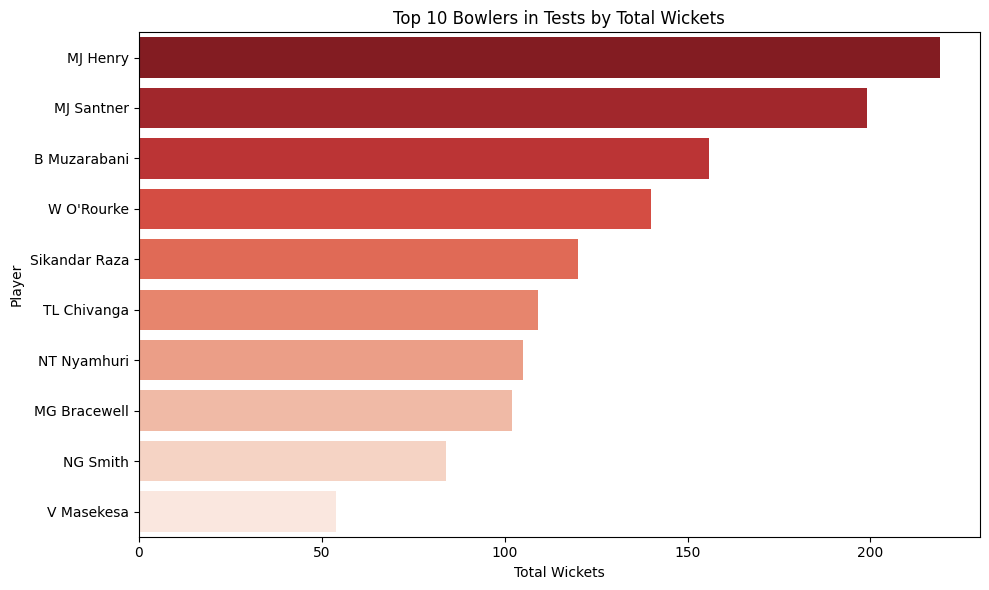

In [45]:
# Top 10 bowlers in Terst
test_top_bowlers = test_summary.groupby('player')['total_wickets'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=test_top_bowlers.values, y=test_top_bowlers.index, palette='Reds_r')
plt.title("Top 10 Bowlers in Tests by Total Wickets")
plt.xlabel("Total Wickets")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

/var/folders/x2/7jtpy5cd0998xxzh4prs67x80000gn/T/ipykernel_1304/290467411.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_avg.values, y=team_avg.index, palette='Purples_r')


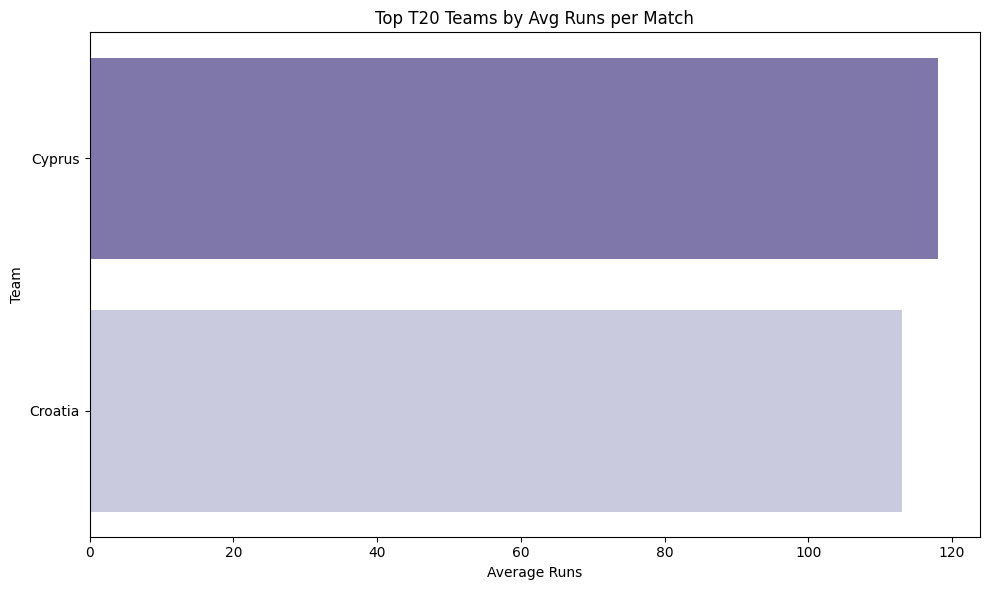

In [44]:
# top t20 team by average run s 
t20_avg = t20_summary.groupby(['team'])['total_runs'].sum().reset_index()
team_avg = t20_avg.groupby('team')['total_runs'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=team_avg.values, y=team_avg.index, palette='Purples_r')
plt.title("Top T20 Teams by Avg Runs per Match")
plt.xlabel("Average Runs")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

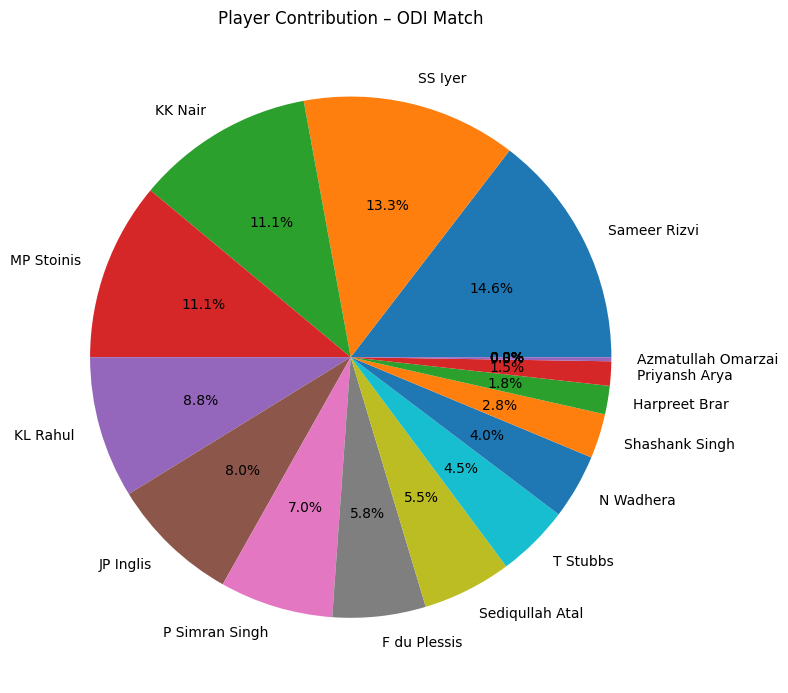

In [ ]:
# ODI match runs
odi_match_runs = odi_summary.groupby('player')['total_runs'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
odi_match_runs.plot(kind='pie', autopct='%1.1f%%')
plt.title(f"Player Contribution – ODI Match")
plt.ylabel("")
plt.tight_layout()
plt.show()

/var/folders/x2/7jtpy5cd0998xxzh4prs67x80000gn/T/ipykernel_1184/2707872577.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=t20_consistent.values, y=t20_consistent.index, palette='viridis')


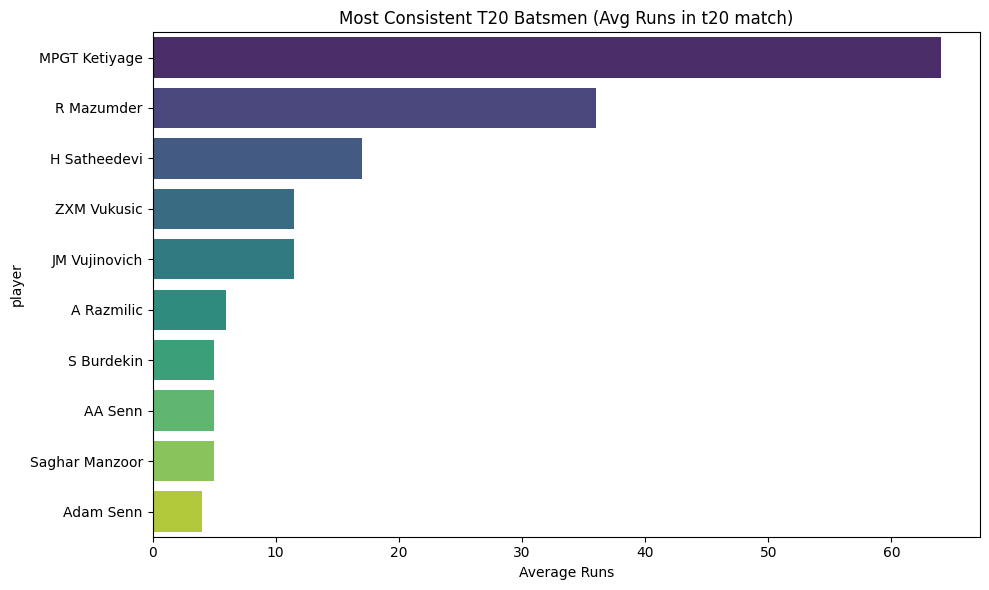

In [ ]:
# consistent runs T20 batsmen
import matplotlib.pyplot as plt
import seaborn as sns
t20_consistent = t20_summary.groupby("player")["total_runs"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=t20_consistent.values, y=t20_consistent.index, palette='viridis')
plt.title("Most Consistent T20 Batsmen (Avg Runs in t20 match)")
plt.xlabel("Average Runs")
plt.ylabel("player")
plt.tight_layout()
plt.show()

/var/folders/x2/7jtpy5cd0998xxzh4prs67x80000gn/T/ipykernel_1184/1411352584.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_avg_runs.values, y=team_avg_runs.index, palette="crest")


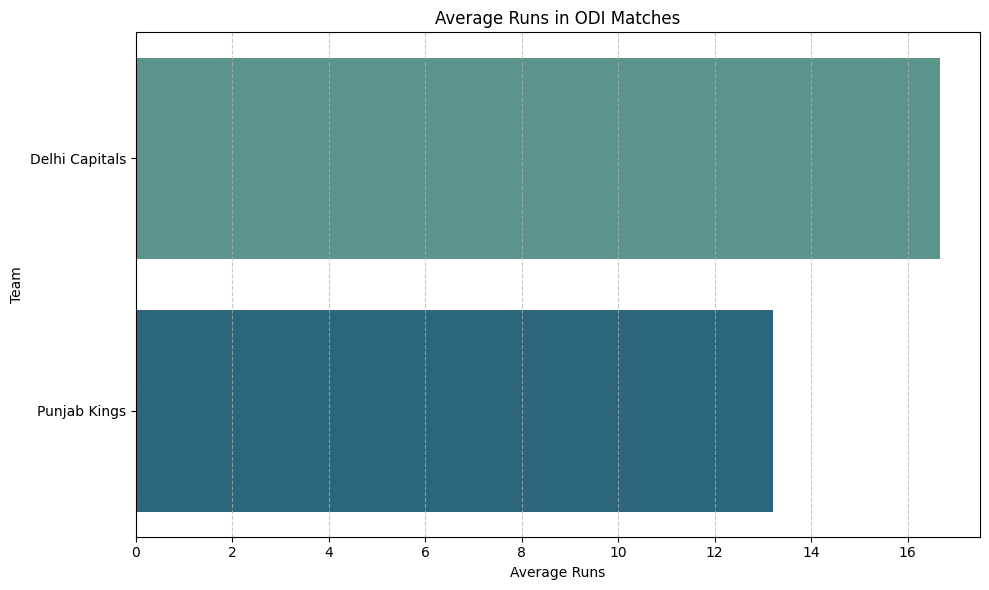

In [180]:
#average runs in odi match
team_avg_runs = odi_summary.groupby("team")["total_runs"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=team_avg_runs.values, y=team_avg_runs.index, palette="crest")
plt.title("Average Runs in ODI Matches")
plt.xlabel("Average Runs")
plt.ylabel("Team")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/x2/7jtpy5cd0998xxzh4prs67x80000gn/T/ipykernel_1304/307320887.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_runs_format, x="format", y="total_runs", palette="plasma")


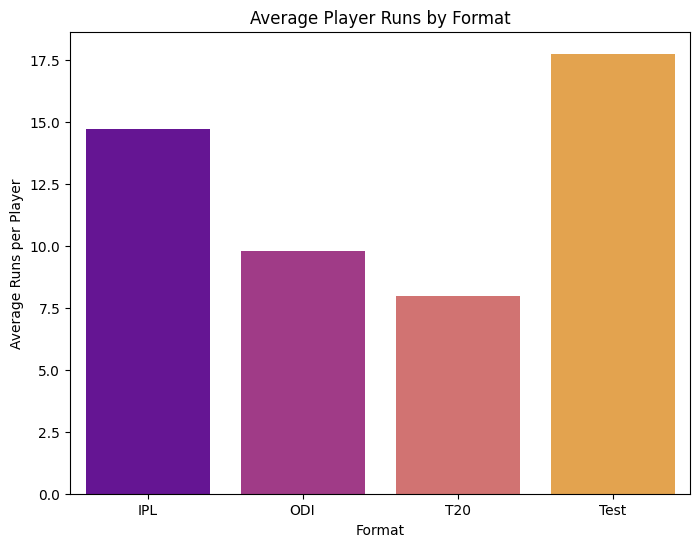

In [46]:
# Average player runs 
test_summary['format'] = 'Test'
odi_summary['format'] = 'ODI'
t20_summary['format'] = 'T20'
ipl_summary['format'] = 'IPL'

# Combine
combined_df = pd.concat([test_summary, odi_summary, t20_summary, ipl_summary])

# Group and plot
avg_runs_format = combined_df.groupby('format')['total_runs'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=avg_runs_format, x="format", y="total_runs", palette="plasma")
plt.title("Average Player Runs by Format")
plt.xlabel("Format")
plt.ylabel("Average Runs per Player")
plt.show()

In [47]:
test_summary.to_csv("test_summary.csv", index=False)
odi_summary.to_csv("odi_summary.csv", index=False)
t20_summary.to_csv("t20_summary.csv", index=False)
ipl_summary.to_csv("ipl_summary.csv", index=False)

In [48]:
all_data = pd.concat([test_summary, odi_summary, t20_summary, ipl_summary], ignore_index=True)
all_data.to_csv("all_matches_summary.csv", index=False)

/var/folders/x2/7jtpy5cd0998xxzh4prs67x80000gn/T/ipykernel_1304/324448889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ipl_wickets.values , y=ipl_wickets.index, palette="plasma")


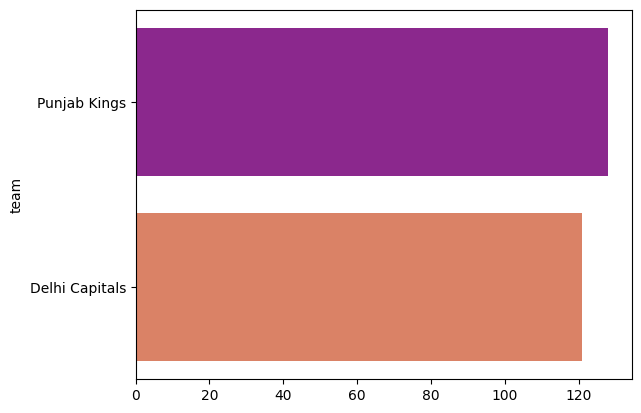

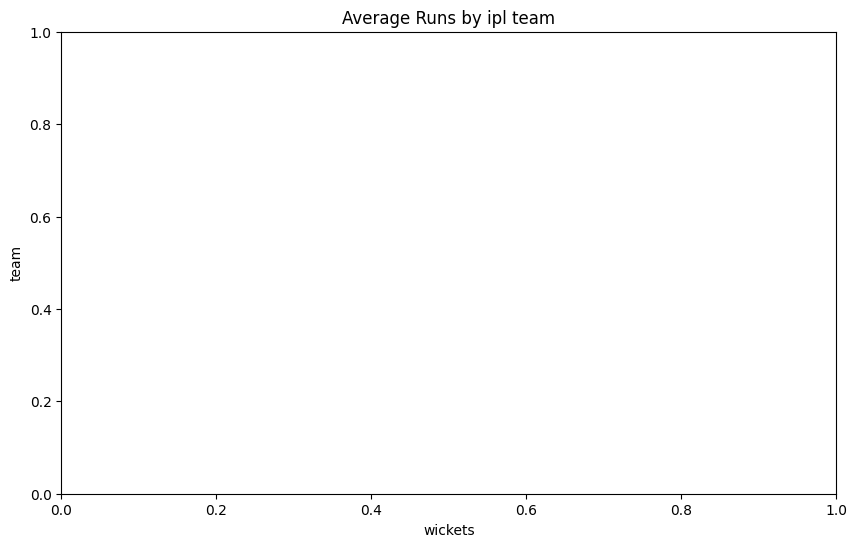

In [50]:
ipl_wickets = ipl_summary.groupby('team')['total_wickets'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=ipl_wickets.values , y=ipl_wickets.index, palette="plasma")
plt.figure(figsize=(10,6))
plt.title("Average Runs by ipl team")
plt.xlabel("wickets")
plt.ylabel("team")
plt.show()


In [51]:
ipl_summary

,team,player,total_runs,total_wickets,format
0,Punjab Kings,Priyansh Arya,6,0,IPL
1,Punjab Kings,P Simran Singh,28,0,IPL
2,Punjab Kings,JP Inglis,32,0,IPL
3,Punjab Kings,SS Iyer,53,0,IPL
4,Punjab Kings,N Wadhera,16,0,IPL
5,Punjab Kings,Shashank Singh,11,0,IPL
6,Punjab Kings,MP Stoinis,44,0,IPL
7,Punjab Kings,Azmatullah Omarzai,1,0,IPL
8,Punjab Kings,M Jansen,0,0,IPL
9,Punjab Kings,Harpreet Brar,7,0,IPL


In [62]:
import mysql.connector
conn=mysql.connector.connect(
    host="localhost",
    user="root",
    password="Saranyasql",
    database="karni"
)

con=conn.cursor()

In [53]:
ipl_summary

,team,player,total_runs,total_wickets,format
0,Punjab Kings,Priyansh Arya,6,0,IPL
1,Punjab Kings,P Simran Singh,28,0,IPL
2,Punjab Kings,JP Inglis,32,0,IPL
3,Punjab Kings,SS Iyer,53,0,IPL
4,Punjab Kings,N Wadhera,16,0,IPL
5,Punjab Kings,Shashank Singh,11,0,IPL
6,Punjab Kings,MP Stoinis,44,0,IPL
7,Punjab Kings,Azmatullah Omarzai,1,0,IPL
8,Punjab Kings,M Jansen,0,0,IPL
9,Punjab Kings,Harpreet Brar,7,0,IPL


In [54]:
t20_summary

,team,player,total_runs,total_wickets,format
0,Croatia,S Houghton,4,0,T20
1,Croatia,ZXM Vukusic,23,0,T20
2,Croatia,OSB Tilley,4,0,T20
3,Croatia,JM Vujinovich,23,0,T20
4,Croatia,Saghar Manzoor,5,0,T20
5,Croatia,H Satheedevi,34,0,T20
6,Croatia,A Beresford-Peirse,1,0,T20
7,Croatia,C Bevin,6,0,T20
8,Croatia,H Beresford-Peirse,7,0,T20
9,Croatia,A Razmilic,6,0,T20


In [55]:
test_summary

,team,player,total_runs,total_wickets,format
0,Zimbabwe,BJ Bennett,24,0,Test
1,Zimbabwe,BJ Curran,24,0,Test
2,Zimbabwe,NR Welch,31,0,Test
3,Zimbabwe,SC Williams,51,0,Test
4,Zimbabwe,CR Ervine,61,0,Test
5,Zimbabwe,Sikandar Raza,7,0,Test
6,Zimbabwe,TE Tsiga,57,0,Test
7,Zimbabwe,NT Nyamhuri,10,0,Test
8,Zimbabwe,V Masekesa,9,0,Test
9,Zimbabwe,B Muzarabani,20,0,Test


In [56]:
odi_summary

,team,player,total_runs,total_wickets,format
0,Zimbabwe,CT Dhururu,12,0,ODI
1,Zimbabwe,K Ndlovu,0,0,ODI
2,Zimbabwe,L Tshuma,4,0,ODI
3,Zimbabwe,CS Mugeri-Tiripano,56,0,ODI
4,Zimbabwe,B Biza,4,0,ODI
5,Zimbabwe,M Mupachikwa,45,0,ODI
6,Zimbabwe,R Pasipanodya,11,0,ODI
7,Zimbabwe,N Gwanzura,14,0,ODI
8,Zimbabwe,M Mavunga,1,0,ODI
9,Zimbabwe,F Chipare,0,0,ODI


In [57]:
import pandas as pd
import mysql.connector
from mysql.connector import Error


table_map=[ ipl_summary,t20_summary,odi_summary,test_summary]
match_list=["ipl","t20","odi","test"]
insert_queries={
    "ipl":"""INSERT IGNORE INTO ipl(team,player,total_runs,total_wickets) VALUES (%s,%s,%s,%s)""",
    "t20":"""INSERT IGNORE INTO t20(team,player,total_runs,total_wickets) VALUES (%s,%s,%s,%s)""",
    "odi":"""INSERT IGNORE INTO odi(team,player,total_runs,total_wickets) VALUES (%s,%s,%s,%s)""",
    "test":"""INSERT IGNORE INTO test(team,player,total_runs,total_wickets)VALUES (%s,%s,%s,%s)"""
}

for table,name in zip(table_map,match_list):
        print(f"processing {table}")
        df=table
        match=name
    
        values = df.values.tolist()
       # values=[tuple(row) for row in df.to_numpy()]
        con.executemany(insert_queries[match],values)
conn.commit()
print(f"inserted {len(values)} rows into {match}")


processing               team              player  total_runs  total_wickets format
0     Punjab Kings       Priyansh Arya           6              0    IPL
1     Punjab Kings      P Simran Singh          28              0    IPL
2     Punjab Kings           JP Inglis          32              0    IPL
3     Punjab Kings             SS Iyer          53              0    IPL
4     Punjab Kings           N Wadhera          16              0    IPL
5     Punjab Kings      Shashank Singh          11              0    IPL
6     Punjab Kings          MP Stoinis          44              0    IPL
7     Punjab Kings  Azmatullah Omarzai           1              0    IPL
8     Punjab Kings            M Jansen           0              0    IPL
9     Punjab Kings       Harpreet Brar           7              0    IPL
10  Delhi Capitals            KL Rahul          35              0    IPL
11  Delhi Capitals        F du Plessis          23              0    IPL
12  Delhi Capitals             KK Nair  

InterfaceError: Failed executing the operation; Not all parameters were used in the SQL statement

In [67]:
# Top 10 batsman in ipl
query="""SELECT player,total_runs FROM ipl ORDER BY total_runs DESC LIMIT 10;"""
con.execute(query)
result=con.fetchall()
conn.commit()
df=pd.DataFrame(result)
df


,0,1
0,Sameer Rizvi,58
1,SS Iyer,53
2,KK Nair,44
3,MP Stoinis,44
4,KL Rahul,35
5,JP Inglis,32
6,P Simran Singh,28
7,F du Plessis,23
8,Sediqullah Atal,22
9,T Stubbs,18


In [68]:
# Top 10 wicket_takers in T20
query="""SELECT player,total_wickets FROM T20 order by total_wickets DESC LIMIT 10"""
con.execute(query)
result=con.fetchall()
df=pd.DataFrame(result)
df

,0,1
0,Waqar Ali,4
1,S Austin,3
2,ZXM Vukusic,2
3,Lovedeep Singh,2
4,H Beresford-Peirse,1
5,R Siriwardena,1
6,A Beresford-Peirse,0
7,C Bevin,0
8,H Beresford-Peirse,0
9,A Razmilic,0


In [69]:
# Top  run-scorers in Tests
query="""SELECT player,total_runs FROM test ORDER BY total_runs DESC"""
con.execute(query)
result=con.fetchall()
df=pd.DataFrame(result)
df

,0,1
0,DP Conway,92
1,DJ Mitchell,80
2,CR Ervine,61
3,TE Tsiga,57
4,SC Williams,51
5,WA Young,41
6,HM Nicholls,38
7,NR Welch,31
8,BJ Curran,24
9,BJ Bennett,24


In [70]:
#Most wickets in each team in  IPL
query="""SELECT team,SUM(total_wickets) AS wickets FROM ipl GROUP BY team ORDER BY wickets DESC"""
con.execute(query)
result=con.fetchall()
df=pd.DataFrame(result)
df

,0,1
0,Punjab Kings,128
1,Delhi Capitals,121


In [71]:
#Team with most wickets in test
query="""SELECT team,SUM(total_wickets) AS wickets FROM test GROUP BY team ORDER BY wickets DESC"""
con.execute(query)
result=con.fetchall()
df=pd.DataFrame(result)
df

,0,1
0,Zimbabwe,768
1,New Zealand,592


In [72]:
 #IPL team with most total runs
query="""SELECT team,SUM(total_runs) AS runs FROM ipl GROUP BY team ORDER BY runs DESC"""
con.execute(query)
result=con.fetchall()
df=pd.DataFrame(result)
df

,0,1
0,Delhi Capitals,200
1,Punjab Kings,198


In [73]:
# Number of players with 50+ runs in ODI

query="""SELECT player,total_runs FROM odi WHERE total_runs>=50"""
con.execute(query)
result=con.fetchall()
df=pd.DataFrame(result)
df

,0,1
0,SS Iyer,53
1,Sameer Rizvi,58


In [74]:
# wickets per player above 3 in T20
query="""SELECT player,total_wickets FROM T20 WHERE total_wickets>=3"""
con.execute(query)
result=con.fetchall()
df=pd.DataFrame(result)
df

,0,1
0,Waqar Ali,4
1,S Austin,3


In [75]:
#DISTRIBUTION OF WICKETS PER PLAYER IN T20
query="""SELECT total_wickets,COUNT(*) as players FROM T20 GROUP BY total_wickets ORDER BY total_wickets DESC """
con.execute(query)
result=con.fetchall()
df=pd.DataFrame(result)
df

,0,1
0,4,1
1,3,1
2,2,2
3,1,2
4,0,16


In [81]:
#  Top 5 highest individual scores in ODI
query="""SELECT player, MAX(total_runs) as high_score
FROM odi
GROUP BY player
ORDER BY high_score DESC
LIMIT 5"""
con.execute(query)
result=con.fetchall()
df=pd.DataFrame(result)
df

,0,1
0,Sameer Rizvi,58
1,SS Iyer,53
2,MP Stoinis,44
3,KK Nair,44
4,KL Rahul,35


In [80]:
# 13. Top 5 best bowling figures in Test (most wickets)
query="""SELECT player, MAX(total_wickets) as best_bowling
FROM test
GROUP BY player
ORDER BY best_bowling DESC
LIMIT 5"""
con.execute(query)
result=con.fetchall()
df=pd.DataFrame(result)
df

,0,1
0,MJ Henry,219
1,MJ Santner,199
2,B Muzarabani,156
3,W O'Rourke,140
4,Sikandar Raza,120


In [83]:
# 14. Average runs per match in IPL
query="""SELECT ROUND(SUM(total_runs) * 1.0 / COUNT(DISTINCT team), 2) as avg_runs_per_match
FROM ipl"""
con.execute(query)
result=con.fetchall()
df=pd.DataFrame(result)
df

,0
0,199.00


In [84]:
#Average wickets per match in T20
query="""SELECT ROUND(SUM(total_wickets) * 1.0 / COUNT(DISTINCT team), 2) as avg_wickets_per_match
FROM t20"""
con.execute(query)
result=con.fetchall()
df=pd.DataFrame(result)
df

,0
0,6.50


In [85]:
 #Players who scored more than 100 in a single match in ODI
query="""SELECT team, player, total_runs
FROM odi
WHERE total_runs >= 100
ORDER BY total_runs DESC"""
con.execute(query)
result=con.fetchall()
df=pd.DataFrame(result)
df

""


In [86]:
# 17. Players with 5-wicket haul in Test match
query="""SELECT team, player, total_wickets
FROM test
WHERE total_wickets >= 5
ORDER BY total_wickets DESC"""
con.execute(query)
result=con.fetchall()
df=pd.DataFrame(result)
df


,0,1,2
0,Zimbabwe,MJ Henry,219
1,Zimbabwe,MJ Santner,199
2,New Zealand,B Muzarabani,156
3,Zimbabwe,W O'Rourke,140
4,New Zealand,Sikandar Raza,120
5,New Zealand,TL Chivanga,109
6,New Zealand,NT Nyamhuri,105
7,Zimbabwe,MG Bracewell,102
8,Zimbabwe,NG Smith,84
9,New Zealand,V Masekesa,54


In [87]:
# Matches where a player scored more than 50 and took 3+ wickets
query="""SELECT team, player, total_runs, total_wickets
FROM test
WHERE total_runs >= 50 AND total_wickets >= 3"""
con.execute(query)
result=con.fetchall()
df=pd.DataFrame(result)
df

""
